# **Kernel function, Basis function**
# **distance, density, similarity**

- 강의 교재 관련 페이지 : 19, 20, 112, 131, 132, 142, 143, 144, 145, 194, 195, 199, 203
- 관련 주제어 : RBF deep learning, Autoencoder, generative model, density estimation, gaussian process estimation, variational inference.

<img src='https://media.istockphoto.com/photos/spring-beautiful-background-with-green-juicy-young-foliage-and-empty-picture-id1301592032?b=1&k=20&m=1301592032&s=170667a&w=0&h=TwSiOgSX3Kc8hRKREuPAg3SQfhLngTMQqAI-xldjuvg='>

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

## **1. Kernel function**
- 1차원 자료를 2차원으로 transformation
- 평균과 분산을 가정한 가우시안 분포를 가정하여 분류

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

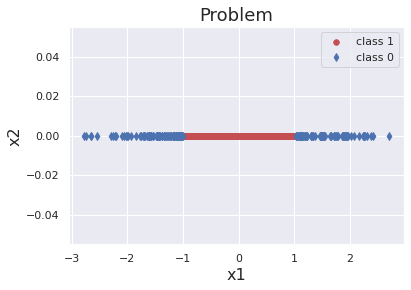

In [2]:
np.random.seed(0)
X = np.random.randn(500); tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]; X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1', fontsize='16'); plt.ylabel('x2', fontsize='16'); 
plt.title('Problem', fontsize='18');plt.show()

### 제곱값을 변환하는 기저함수(basis function)을 사용
<font color='blue'> **Kernel function**

$(x_1)→ϕ(x)=(x_1^2)$

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

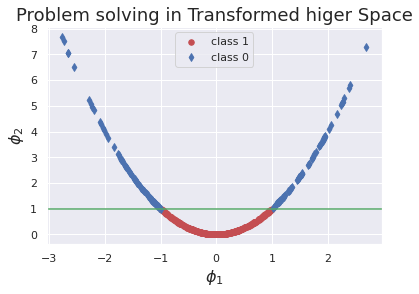

In [3]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel(r'$\phi_1$',fontsize='16'); plt.ylabel(r'$\phi_2$',fontsize='16')
plt.title('Problem solving in Transformed higer Space', fontsize='18')
plt.axhline(y= tr, color='g', linestyle='-')

## **2. 단변량 가우시안 커널 추정(Univariate gaussian kernel estimation)**
- 1. 평균과 분산을 갖는 2개의 가우시안 분포를 가정
- 2. $x_1$의 값인 [-4 -3 -2 -1  0  1  2  3  4]과 2개 분포의 우도(likelihood)인 pdf를 기저축으로 하여 mapping space생성
- 3. $x_1$과 2개 분포와 similarity or likelihood


<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/7329742f44d2b1e907ccd95edde6af5d1c797efa'>

<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/de277b68ab36203f079548f0d90d0fffa700594c'>




$ {\theta} = ({\mu}, {\sigma})$

<font color='blue'> **Kernel function**

$(x_1)→ϕ(x)=$ *(pdf of normal distribution of* $x_1$) = $L({\theta}|x)$

$L({\theta}|x) = P({\theta}|x)$ = $\frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{x-\mu}{\sigma}$




Text(0, 0.5, 'Similarity')

Text(0.5, 0, 'x1')



x1 :  [-4 -3 -2 -1  0  1  2  3  4]


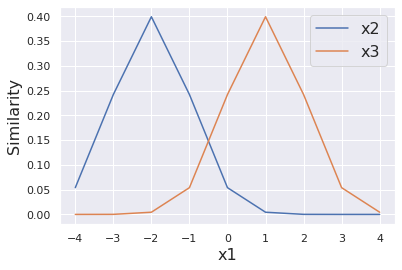

In [4]:
import scipy.stats as stats
x1 = np.arange(-4, 5, 1)
x2 = stats.norm.pdf(x1, -2, 1); x3 = stats.norm.pdf(x1, 1, 1)  # 정규분포로 x1을 fitting
data = pd.DataFrame(np.c_[x1, x2, x3], columns = ['x1', 'x2', 'x3'])
data.set_index('x1', inplace=True); data[['x2', 'x3']].plot()
plt.ylabel('Similarity', fontsize = 16); plt.xlabel("x1", fontsize = 16)
plt.legend(fontsize = 16)
print('\n')
print('x1 : ', x1)

$x_1$의 값과 두 개의 pdf(similarity function, kernel function)으로 변환된 겂

In [5]:
np.set_printoptions(suppress=True)
np.c_[x1, x2, x3]

array([[-4.        ,  0.05399097,  0.00000149],
       [-3.        ,  0.24197072,  0.00013383],
       [-2.        ,  0.39894228,  0.00443185],
       [-1.        ,  0.24197072,  0.05399097],
       [ 0.        ,  0.05399097,  0.24197072],
       [ 1.        ,  0.00443185,  0.39894228],
       [ 2.        ,  0.00013383,  0.24197072],
       [ 3.        ,  0.00000149,  0.05399097],
       [ 4.        ,  0.00000001,  0.00443185]])

붉은 직선으로 $x_1$ 값을 classification

Text(0, 0.5, 'x3')

Text(0.5, 0, 'x2')

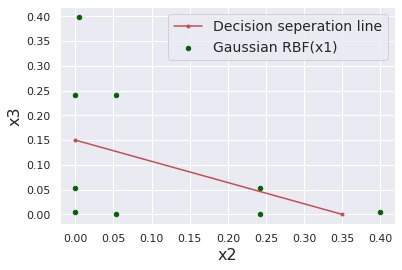

In [6]:
ax1 = data.plot.scatter(x='x2', y='x3', c='DarkGreen', label='Gaussian RBF(x1)')
plt.plot([0,0.35], [0.15,0.00], 'r.-', label='Decision seperation line')
plt.legend(fontsize = 14); plt.ylabel('x3', fontsize = 16); plt.xlabel("x2", fontsize = 16)

### 잠재그룹이 존재하는 경우 분류 알고리즘

<img src='https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg' width =500>

Text(0, 0.5, 'Similarity')

Text(0.5, 0, 'x(unseen data)')

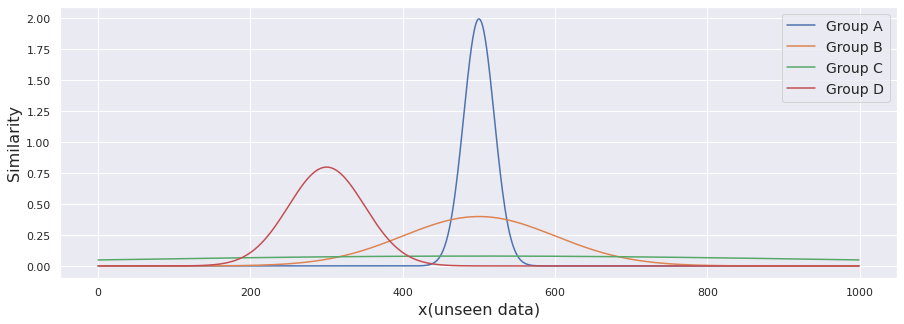

In [7]:
import scipy.stats as stats
x = np.arange(-5, 5, 0.01) # X축 interpolation(보간법)
A = stats.norm.pdf(x, 0, 0.2)  # 평균이 -2, 분산이 1인 sample 생성
B = stats.norm.pdf(x, 0, 1.0) #
C = stats.norm.pdf(x, 0, 5.0)
D = stats.norm.pdf(x, -2, 0.5)

data = pd.DataFrame(np.c_[A, B, C, D], columns = ['Group A', 'Group B', 'Group C', 'Group D'])
data.plot(figsize=(15,5))
plt.ylabel('Similarity', fontsize = 16); plt.xlabel("x(unseen data)", fontsize = 16)
plt.legend(fontsize = 14)

Text(0, 0.5, 'Group D')

Text(0.5, 0, 'Group A')

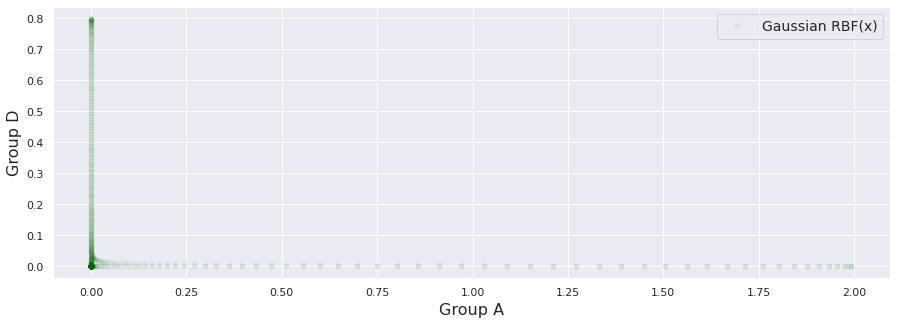

In [8]:
ax1 = data.plot.scatter(x='Group A', y='Group D', c='DarkGreen', label='Gaussian RBF(x)', figsize=(15,5), alpha = 0.05)
plt.legend(fontsize = 14)
plt.ylabel('Group D', fontsize = 16)
plt.xlabel("Group A", fontsize = 16)

Text(0, 0.5, 'Group B')

Text(0.5, 0, 'Group A')

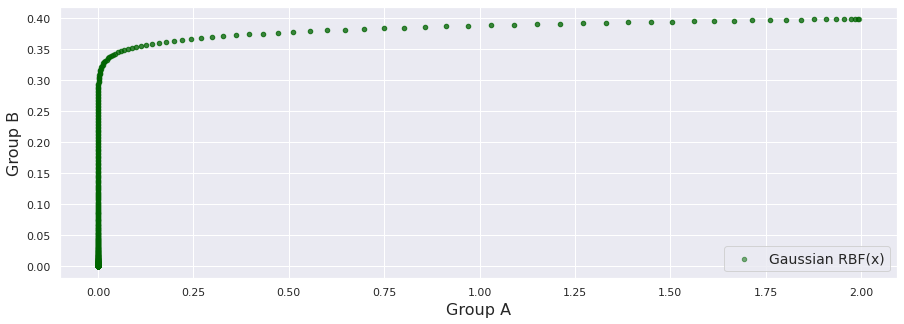

In [9]:
ax1 = data.plot.scatter(x='Group A', y='Group B', c='DarkGreen', label='Gaussian RBF(x)', figsize=(15,5), alpha = 0.5)
plt.legend(fontsize = 14)
plt.ylabel('Group B', fontsize = 16)
plt.xlabel("Group A", fontsize = 16)

## **3. Original space**

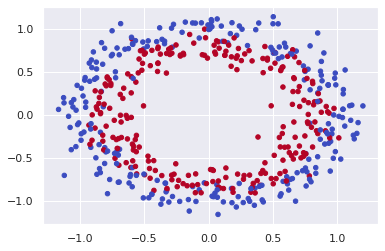

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

- KDE plot으로 데이터에 hidden group이 2 그룹(two peak mountains)이라는 것을 추론한다
- seaborn의 KDE 함수는 gaussian densitity function을 가진 알고리즘

No handles with labels found to put in legend.


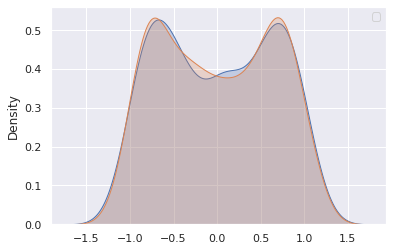

In [11]:
sns.kdeplot(X[:,0], shade=True)
sns.kdeplot(X[:,1], shade=True)
plt.legend()

- 2개의 Hiddden 그룹(latent variables)을 무시하고 단일 그룹으로 가정하여 데이터의 평균(0)과 분산(1)으로 fitting 하는 경우

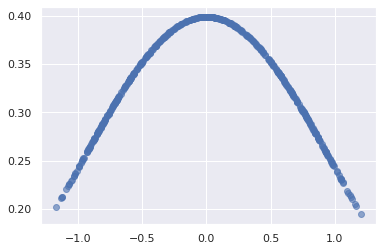

In [12]:
plt.scatter(X[:,0], stats.norm.pdf(X[:,0]), 
            alpha=0.6, label='norm pdf of X[:, 0]') # norm.pdf(x, loc=0, scale=1)

## **4. Mapping space**
<img src='https://images.unsplash.com/photo-1517976487492-5750f3195933?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cm9ja2V0fGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=800&q=60' width=500>

### **4.1 Identity basis fuction space**

<font color='blue'> **Kernel function**
### $ f(x) = w^T X = \sum_{i=1} ^{N} {w_i} {x_i}$
- Original data is tranformed (lineary) by $f(x)$, identity basis fuction
- It seems to be linear regression form.
- It is **impossible** for original data to be **linearly separable**.

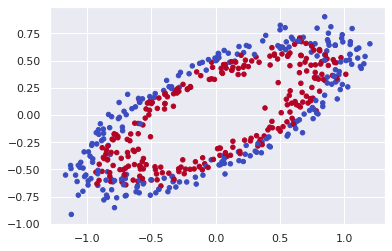

In [13]:
ax = plt.scatter(X[:,0], np.dot(X, [0.5, 0.5]), c=y, s=20, cmap='coolwarm')

### **4.2. General basis fuction space**
- 두개 instance(파란색과 빨강색)의 distance를 동시에 고려하여 mapping

Radial basis functions (the $φ(•)$ in equation 1) have typically taken one of the following forms:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/b152d611f324cd2ae1012e79124724b1e6f12cdc'>


<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/e81323236a9f30fba864c97c9a5664c762cc7276'>

where the approximating function $y(x)$ is represented as a sum of $N$ radial basis functions, each associated with a different center ${x} _{i}$, and weighted by an appropriate coefficient $w_{i}$ can be estimated using the matrix methods of linear least squares, because the approximating function is linear in the weights $w_{i}$.

where $λi$ represents a coefficient in to be determined, φ
represents a radial basis function whose form is to be
selected, Ci represents a point, or a “center” in r whose
position is to be determined, and || • || represents the
traditional Euclidean norm; there are k “centers” (k must also
be determined), and r is the dimension of the input vector. 


- $φ(r) = r$ (linear)
- $φ(r) = r^3$ (cubic)
- $φ(r) = r^2 log$  $r$ (thin plate spline)
- **$φ(r) = e^{-r^2}$ (Gaussian)**
- $φ(r) = sqrt(r^2 + a^2)$ (multiquadric)
- $φ(r) = 1 / sqrt(r^2 + a^2)$ (inverse multiquadric)

3차원으로 mapping을 하였지만 선형성, $φ(r) = r$ (linear)을 그대로 유지

<Figure size 576x432 with 0 Axes>

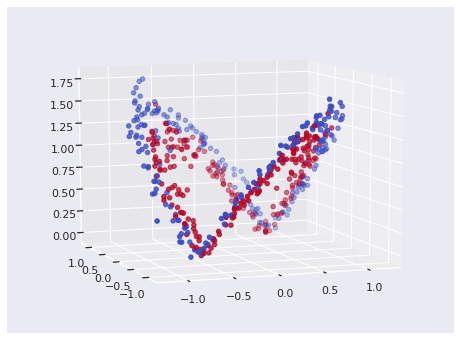

In [14]:
from mpl_toolkits import mplot3d
r = np.abs(X[:, 0] - X[:, 1]) # r = || x - xi ||, L1 norm
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

- 3차원으로 mapping을 하였고 비선형성, $φ(r) = e^{-r^2}$ (Gaussian)을 갖도록 mapping
- Original data is tranformed (lineary) by $f(x)$, identity basis fuction
- It seems to be linear regression form.
- It is **impossible** for original data to be **linearly separable**.

<Figure size 576x432 with 0 Axes>

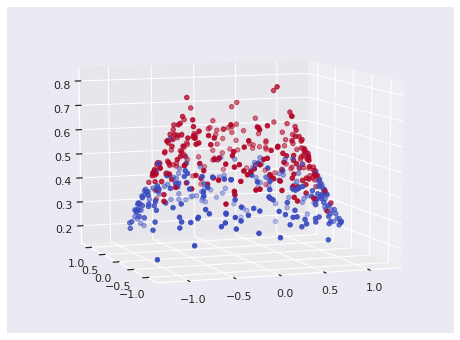

In [15]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))  #r = e (-|| x - xi ||^2), r= e(-L1 norm^2) 
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

<Figure size 576x432 with 0 Axes>

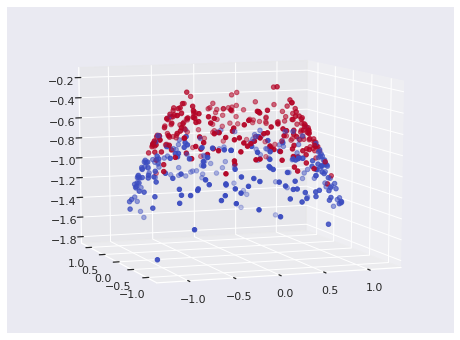

In [16]:
from mpl_toolkits import mplot3d
r = -(X ** 2).sum(1)  # L1 norm^2, 두 개 인스턴스의 피타고라스 거리(음수로)로 mapping 
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

## SVC with FunctionTranformer in scikit learn
- source : https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html

In [17]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='Class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='Class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'XOR Problem')

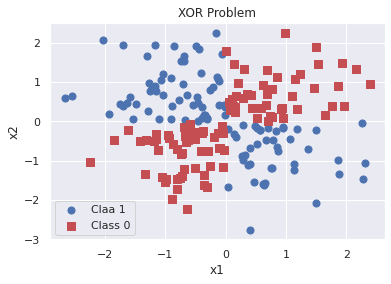

In [18]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='Claa 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Problem")

### XOR 문제를 풀기 위해 다음과 같이 상호 곱(cross-multiplication) 항을 추가한 기저함수(basis function)을 사용 : kernel fuction
$(x_1,x_2)→ϕ(x)=(x_1^2,\sqrt[2]{2}x_1 x_2,x_2^2)$

In [19]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [20]:
def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

FunctionTransformer(basis).fit_transform(X)

array([[0.        , 0.        , 1.        ],
       [4.        , 8.48528137, 9.        ]])

(-6.0, 6.0)

Text(0.5, 1.0, 'Data distribution in mapping space')

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

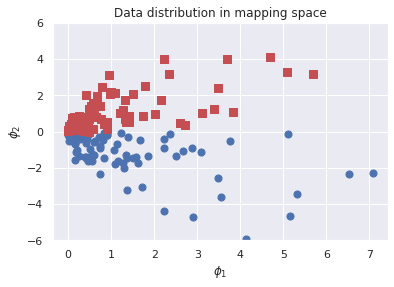

In [21]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("Data distribution in mapping space")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

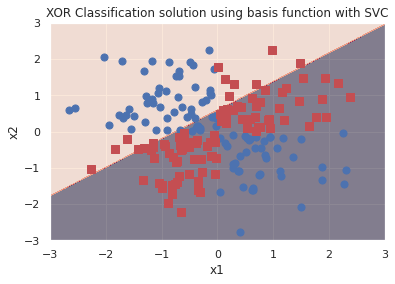

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

basismodel = Pipeline([#("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "XOR Classification solution using basis function with SVC")

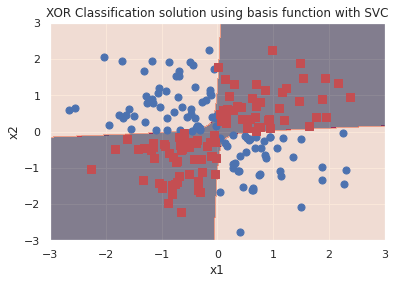

In [23]:
basismodel = Pipeline([("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "XOR Classification solution using basis function with SVC")

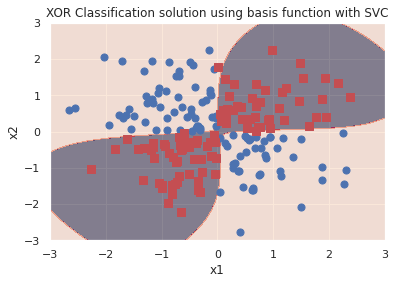

In [24]:
basismodel = Pipeline([#("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="rbf"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "XOR Classification solution using basis function with SVC")

# End